# PRiAD 3 - test zaliczający

> **Zadanie 1** Wczytaj dane dowolnego z dwóch plików zawierających kursy walut. Wykorzystujac miary tendencji centralnej oraz miary rozrzutu określ dla każdej waluty w którym półroczu którego roku (rozważ jedynie półrocza, dla których znane są wszystkie kursy) kurs był najwyższy, najniższy (biorąc pod uwagę jego wartość średnią w danym okresie) oraz wykazywał największą zmienność.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Test obejmuje materiał z ćwiczenia PRiAD3, wymaga także znajmości zagadnień z wcześniejszych ćwiczeń.

In [4]:
# Miejsce na kod
w = pd.read_excel('waluty1.xls')
w = w.dropna()
w['polrocze'] = 0
#print(w.head())
for i in w.index:
    if w.loc[i]['mies']<=6:
        w.at[i,'polrocze'] = 1
    else:
        w.at[i,'polrocze'] = 2
        
        
w = w.drop(columns=['dzien','mies'])
w = w.groupby(['rok','polrocze']).mean()
print(w)

print("Najwyzsze kursy walut: ")
dfmax = pd.concat([w.idxmax(), w.max()], axis = 1)
dfmax.columns =  ['Rok, Polrocze','kurs']
print(dfmax , "\n")

print("Najnizsze kursy walut: ")
dfmin = pd.concat([w.idxmin(), w.min()], axis = 1)
dfmin.columns =  ['Rok, Polrocze','kurs']
print(dfmin , "\n")

#Aby określić zmienność poszczególnych walut użyję zmiennej standardowej
print("Zmiany kursow walut: ")
dfch = pd.concat([w.std()], axis=1)
dfch.columns =  ['Odchylenie standardowe']
print(dfch)

        



                    CHF       USD       EUR       JPY
rok  polrocze                                        
2006 1         2.492556  3.162831  3.893071  2.735987
     2         2.463437  3.045762  3.903084  2.605120
2007 1         2.357145  2.895351  3.845133  2.411950
     2         2.253053  2.643838  3.724451  2.288862
2008 1         2.175156  2.285444  3.492445  2.178006
     2         2.258416  2.524870  3.532994  2.511239
2009 1         2.972225  3.362866  4.474228  3.527870
     2         2.765322  2.882845  4.187708  3.145592
2010 1         2.786023  3.019919  3.999321  3.306145
     2         3.005494  3.095204  4.005971  3.612191
Najwyzsze kursy walut: 
    Rok, Polrocze      kurs
CHF     (2010, 2)  3.005494
USD     (2009, 1)  3.362866
EUR     (2009, 1)  4.474228
JPY     (2010, 2)  3.612191 

Najnizsze kursy walut: 
    Rok, Polrocze      kurs
CHF     (2008, 1)  2.175156
USD     (2008, 1)  2.285444
EUR     (2008, 1)  3.492445
JPY     (2008, 1)  2.178006 

Zmiany kursow walut:

> **Zadanie 2** Wczytaj dane z drugiego pliku zawierającego kursy walut, z którego NIE skorzystałeś w zadaniu 1. Zbadaj korelacje kursów walut w załum obserwowanym okresie. Które waluty są ze sobą najbardziej, a które najmniej skorelowane?

          EUR      USD      CHF
0     1.16970  0.95000  0.67010
1     1.16560  0.95000  0.66880
2     1.17440  0.95000  0.67660
3     1.15740  0.95000  0.66330
4     1.16720  0.95000  0.66500
...       ...      ...      ...
7405  4.32913  3.95572  4.05341
7406  4.31751  3.96599  4.05969
7407  4.30592  3.92970  4.05768
7408  4.29582  3.92137  4.06419
7409  4.30714  3.87587  4.04516

[7410 rows x 3 columns]
          EUR       USD       CHF
EUR  1.000000  0.843085  0.866737
USD  0.843085  1.000000  0.728293
CHF  0.866737  0.728293  1.000000


<AxesSubplot:>

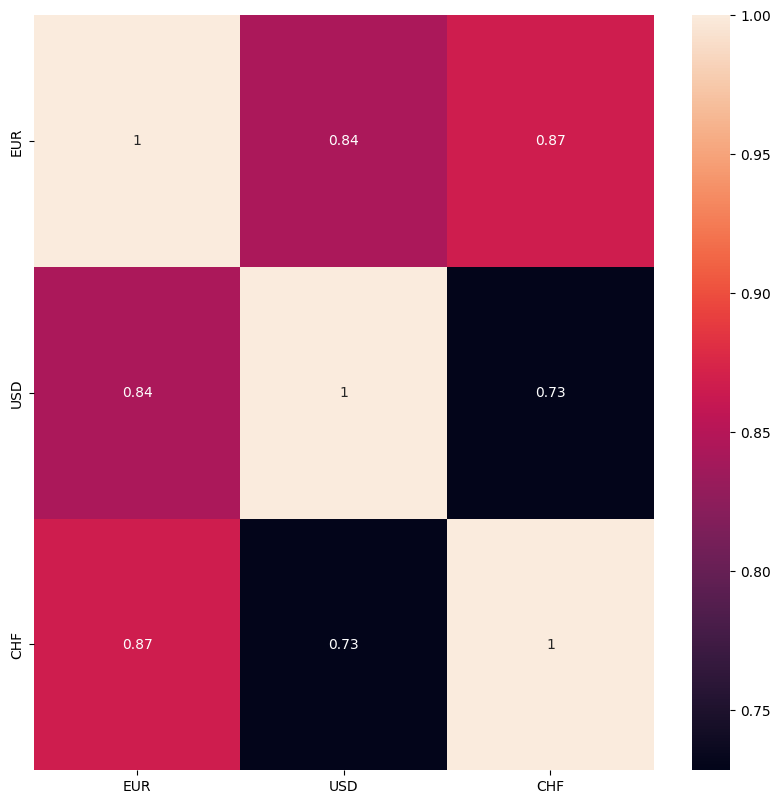

In [37]:
# Miejsce na kod
eur = pd.read_excel('kursy.xlsx', sheet_name='EURPLN', skiprows=2, usecols='A,E')
eur.drop(columns='Data', inplace=True)

chf = pd.read_excel('kursy.xlsx', sheet_name='CHFPLN', skiprows=2, usecols='A,E')
chf.drop(columns='Data', inplace=True)

usd = pd.read_excel('kursy.xlsx', sheet_name='USDPLN', skiprows=2, usecols='A,E')
usd.drop(columns='Data', inplace=True)

eur['USD'] = usd['Zamkniecie']
eur['CHF'] = chf['Zamkniecie']
eur = eur.rename(columns = {'Zamkniecie': 'EUR'}, inplace = False)
print(eur)

print(eur.corr())
plt.figure(figsize=(10,10),dpi = 100)
sns.heatmap(eur.corr(),annot = eur.corr())






Na podstawie tabelki oraz mapy ciepła możemy zauważyć, że najbardziej skorelowanymi walutami są EUR i CHF, a najmniej CHF i USD. Dodatkowo w zadaniu pominąłem dane WIG30, ponieważ nie jest to waluta.

> **Zadanie 3** Zmień nazwę tego skryptu na następującą "PRiAD3zal_Imię_Nazwisko.ipynb" i wgraj wgraj go do ISOD-a we wskazane miejsce, nie przekraczając wyznaczonego terminu.

*Wersja na rok. akad. 21/22*